**The following script generates .svg and .jpg plots from an individual gene you define in the variable below and stores them locally in your Downloads folder.**

# Data download from Google Drive (.csv files) and DataFrame creation

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/MyDrive/PYTHON/RNASeq_Lgr5_Apcf_Lsd1f_analyzer/ApK_LsdK_DuovsApcK_Duo_deg.csv', 'r') as duo:
  df_duo = pd.read_csv(duo, sep = ";")

with open('/content/drive/MyDrive/PYTHON/RNASeq_Lgr5_Apcf_Lsd1f_analyzer/ApK_LsdK_IlevsApcK_Ile_deg.csv', 'r') as ile:
  df_ile = pd.read_csv(ile, sep = ";")

MessageError: ignored

# Gene input

3. Write down the gene you want to plot (capitalize the first letter) below and click Play ▶

In [ ]:
# Write down the gene you want to be plotted after gene. (i.e. gene = "Cd4")'
gene = "padi4"
gene = gene.capitalize()
print(f"The following gene will be plotted in the next steps: {gene}")

The following gene will be plotted in the next steps: Padi4


# Reading RNASeq data and storing values for plotting

4. Click Play below ▶ to load the data from the Excel files

In [ ]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Extracting full row from each gene and assigning it to a variable
gene_row_duo = df_duo[df_duo.gene_name == gene]
gene_row_ile = df_ile[df_ile.gene_name == gene]

# Extract individual TPMs from row and add them to a list
try:
  duo_single_ko_TPMs = []
  for n in range (1,7):
    duo_single_ko_TPMs.append(int(gene_row_duo[f"ApcK_D{n}_count"]))
except TypeError:
  print(f"{gene} was not found on the .csv file, make sure you're using the right gene notation")

try:
  duo_double_ko_TPMs = []
  for n in range (1,8):
    duo_double_ko_TPMs.append(int(gene_row_duo[f"ApcKLsd1K_D{n}_count"]))
except TypeError:
  pass

try:
  ile_single_ko_TPMs = []
  for n in range (1,7):
    ile_single_ko_TPMs.append(int(gene_row_ile[f"ApcK_I{n}_count"]))
except TypeError:
  pass

try:
  ile_double_ko_TPMs = []
  for n in range (1,8):
    ile_double_ko_TPMs.append(int(gene_row_ile[f"ApcKLsd1K_I{n}_count"]))
except TypeError:
  pass


# Append an extra NaN value to the shorter lists (to avoid pandas error)
duo_single_ko_TPMs.append(np.nan)
ile_single_ko_TPMs.append(np.nan)

# Get adjusted p-values of Duo and Ile comparisons and store them into a variable
try:
  p_val_d = float(gene_row_duo["padj"])
  logfc_d = round(float(gene_row_duo["log2FoldChange"]), 2)
  p_val_i = float(gene_row_ile["padj"])
  logfc_i = round(float(gene_row_ile["log2FoldChange"]), 2)
  # If the code snippet finds the gene provide a message
  print("All looks preem choom, proceed with the next step ✌️")
except TypeError:
  pass

# Create a f-string containing all stat info that will be displayed as the x axis label
stats = f"Duo ApcKO vs Duo ApcKO Lsd1 KO ---- p: {p_val_d} ---- logfc: {logfc_d} \nIle ApcKO vs Ile ApcKO Lsd1 KO ---- p: {p_val_i} ---- logfc: {logfc_i}"

All looks preem choom, proceed with the next step ✌️


# Plotting

5. Click Play below ▶ to plot the desired gene TPMs (Transcripts per Million)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

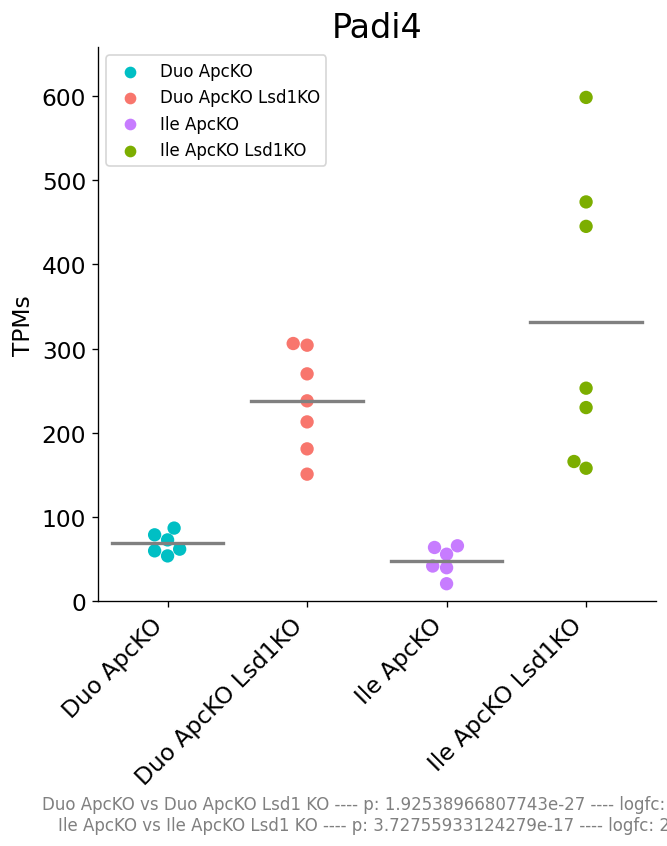

Duo ApcKO vs Duo ApcKO Lsd1 KO ---- p: 1.92538966807743e-27 ---- logfc: 1.97 
Ile ApcKO vs Ile ApcKO Lsd1 KO ---- p: 3.72755933124279e-17 ---- logfc: 2.59


In [ ]:
# Define and create the DataFrame to plot

dataset = {
    "Duo ApcKO":duo_single_ko_TPMs,
    "Duo ApcKO Lsd1KO":duo_double_ko_TPMs,
    "Ile ApcKO":ile_single_ko_TPMs,
    "Ile ApcKO Lsd1KO":ile_double_ko_TPMs
}

try:
  df = pd.DataFrame(dataset)
except ValueError:
  print(f"{gene} was not found on the .csv file, make sure you're using the right gene notation")
  sys.exit(1)

# Plot dataset with Seaborn
plt.figure(figsize=(6,6), dpi=120)

#If you want to hide the legend remove the hue parameter and comment out the #plt.legend() method below
sns.swarmplot(data=df.melt(), x="variable", y="value", palette=['#00BFC4','#F8766D','#C77CFF','#7CAE00'], size = 8, hue = "variable")
plt.legend().set_title(None)
plt.title(label=gene, fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')

# Plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'grey', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="variable",
            y="value",
            data=df.melt(),
            showfliers=False,
            showbox=False,
            showcaps=False)

# Reset the axis title after using boxplot to plot the mean line
plt.ylabel('TPMs', fontsize=14)
plt.xlabel(stats, color="grey", fontsize=10, loc="center")


# Fill the NaN values in the DataFrame to find the max value using to_numpy().max()
df.fillna(0, inplace=True)

# Change the y axis limits in order to leave space to plot the p-value on top
ax1 = plt.gca()
y_top_limit = (df.to_numpy().max()) + (df.to_numpy().max())*0.1
ax1.set_ylim([0, y_top_limit])

# Hide top and right spines from the frame
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

# Save the result as a vector image to the default content folder
plt.savefig(f"{gene}_TPMs.svg", format = 'svg', dpi=300, bbox_inches='tight')
plt.savefig(f"{gene}_TPMs.png", format = 'png', dpi=300, bbox_inches='tight')

# Next line automatically downloads a copy of the .jpg plot
#files.download(f"{gene}_TPMs.svg")
files.download(f"{gene}_TPMs.png")

# Display the result
plt.show()

print(stats)